# <span style="color:green"> Laboratorio di Simulazione Numerica (LSN) </span>

Nome: Davide Castellani  
Matricola: 967270  
email: davide.castellani1@studenti.unimi.it

## <span style="color:red">  Esercitazione 12 </span>

L'obiettivo di quest'esercitazione è creare una _deep neural network_ (DNN) e una _deep convolutional neural network_ (DCNN) che riconoscano le cifre da 0 a 9 scritte a mano.

### Caricamento dei dati del MNIST

Per allenare le reti è necessario avere un enorme quantità di cifre scritte a mano: il MNIST ne fornisce 70000, in immagini quadrate $28\times28$ pixel, dove ogni pixel può contenere 256 gradazioni di grigio (dal bianco al nero).  
Una volta caricato, il dataset viene diviso in dati di train e di test.

In [1]:
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt

seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

2023-07-13 13:55:18.010033: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


X_train shape: (60000, 28, 28)
Y_train shape: (60000,)


I dati però devono essere convertiti affinché possano essere usati dalla categorical cross entropy.

X_train shape: (60000, 784)
X_test shape: (10000, 784)

an example of a data point with label 1


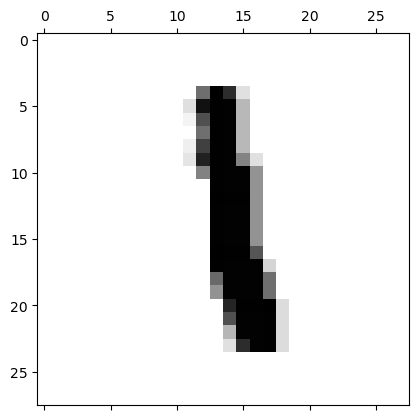

... and with label [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [2]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

nexemple = 6

# look at an example of data point
print('an example of a data point with label', Y_train[nexemple])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[nexemple,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[nexemple], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

## <span style="color:blue"> Esercizio 12.1 </span>

Si vuole ora creare la DNN, composta solo da layer densi: chiaramente quello di input deve accettare $28\times28=784$ valori della scala di grigi mentre quello di output è composto da 10 neuroni, uno per ogni  cifra.

Il _Dropout_ viene introdotto per prevenire che il modello si adatti troppo ai dati di addestramento e non generalizzi bene ai nuovi dati (overfitting). In pratica, durante l'addestramento, disattiva casualmente dei neuroni, riducendo la dipendenza e l'interconnessione tra i nodi della rete, aumentando così la robustezza del modello.
Durante la fase di test, il Dropout non viene applicato.

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


Si definisce qui un metodo per compilare il modello che permette di cambiare facilmente l'ottimizzatore che verrà utilizzato.  
Gli altri argomenti sono la loss function e la metrica di validazione, che nei problemi di classificazione categorica sono rispettivamente la _categorical_crossentropy_ e l'_accuracy_, ovvero la percentuale di immagini correttamente classificate.

In [4]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adamax(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


Definita la dimensione del _minibatch_ e il numero di epoche, si allena la rete usando il metodo fit( ) specificando i dati di training e di test.

In [5]:
# training parameters
batch_size = 32
epochs = 30

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3987 - acc: 0.8846 - val_loss: 0.1670 - val_acc: 0.9496
Epoch 2/30
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1928 - acc: 0.9470 - val_loss: 0.1225 - val_acc: 0.9642
Epoch 3/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1440 - acc: 0.9587 - val_loss: 0.0975 - val_acc: 0.9698
Epoch 4/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1151 - acc: 0.9671 - val_loss: 0.0855 - val_acc: 0.9722
Epoch 5/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0948 - acc: 0.9727 - val_loss: 0.0812 - val_acc: 0.9751
Epoch 6/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0805 - acc: 0.9770 - val_loss: 0.0764 - val_acc: 0.9757
Epoch 7/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0712 - acc: 0.9790 - val_loss: 0.0680 - val_acc: 0.9791
Epoch 8/30
1875/1875 [==============================] -

Con il metodo evaluate( ) possiamo tener traccia della loss e dell'accuracy, che vengono sotto riportate in funzione del numero di epoca.  
Si noti che l'accuratezza del training può essere superata da quella di testing: ciò è dovuto al dropout, attivo solo nella prima fase.

313/313 [==============================] - 1s 3ms/step - loss: 0.0685 - acc: 0.9833

Test loss: 0.06847883015871048
Test accuracy: 0.983299970626831


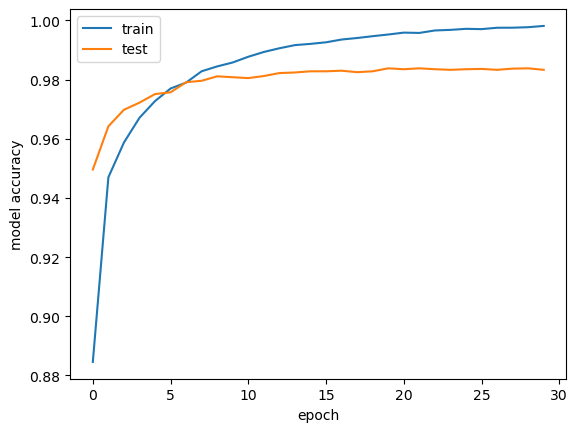

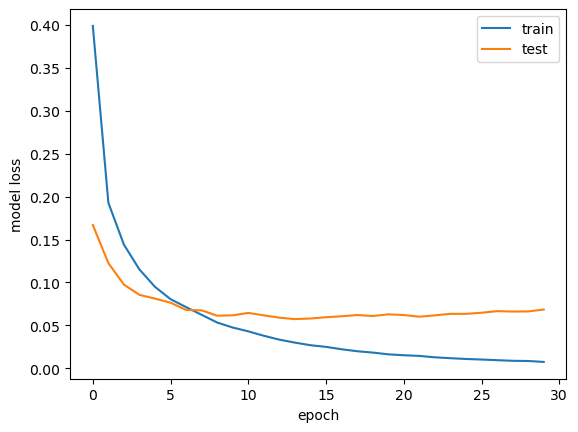

In [6]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

Possiamo dunque utilizzare il modello ultimato per fare previsioni su nuove cifre.

313/313 [==============================] - 2s 4ms/step


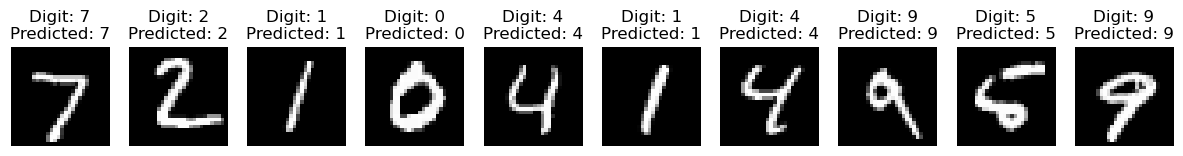

In [7]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

### Variazioni sul tema

Si sono provati vari ottimizzatori, salvando volta per volta la loro loss e l'accuracy nei dati di testing. Dalla distribuzione graficata sotto, si deduce Adamax e SGD siano gli ottimizzatore preferibili in questo caso, in quanto minimizzano la loss e massimizzano l'accuracy.

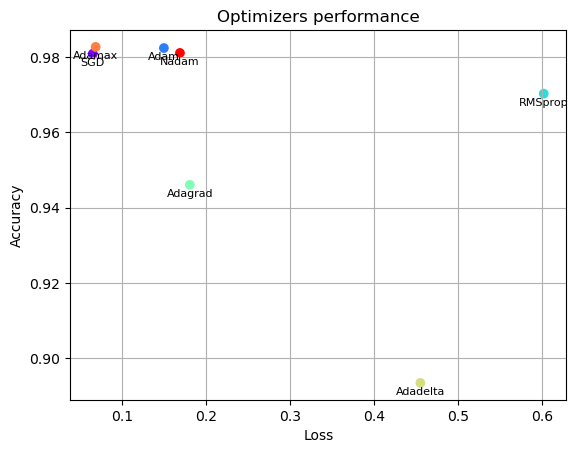

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Lettura dei dati dal file
data = []
with open('opti_performances.txt', 'r') as file:
    for line in file:
        line = line.strip().split('\t')
        name = line[0]
        x = float(line[1])
        y = float(line[2])
        data.append((name, x, y))

# Estrazione delle colonne
names = [row[0] for row in data]
x_values = [row[1] for row in data]
y_values = [row[2] for row in data]

# Creazione dello scatter plot con colori diversi per ogni punto
colors = np.arange(len(names))
plt.scatter(x_values, y_values, c=colors, cmap='rainbow', marker='o')

# Etichettatura dei punti con il nome
for i in range(len(names)):
    plt.text(x_values[i], y_values[i]-0.001, names[i], fontsize=8, ha='center', va='top')

# Etichette degli assi
plt.xlabel('Loss')
plt.ylabel('Accuracy')

# Titolo del grafico
plt.title('Optimizers performance')
plt.grid(True)

# Mostra il grafico
plt.show()

## <span style="color:blue"> Esercizio 12.2 </span>

Si vuole ora creare la DCNN, composta da layer densi e convoluzionali.  
Il grande passo in avanti che ci permette di fare una rete del genere è di sfruttare le correlazioni spaziali, come l'invarianza per traslazioni della cifra nell'immagine, che finora, trattandola come un vettore 1D a 784 entrate, era persa.

Per farlo però dobbiamo modificare la forma dei dati d training e di test come segue.

In [9]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


Definiamo quindi un metodo per la creazione della DCNN. Oltre ai layer densi e Dropout, sono stati aggiunti:
- **Conv2D**: questi layer creano una convoluzione degli input, ovvero una sorta di filtraggio dell'immagine tramite una finestra (kernel) che scorre su di essa, moltiplica i filtri punto per punto ai valori dell'immagine e somma i risultati per produrre un valore singolo nella _feature map_ di output. Questa operazione consente di estrarre caratteristiche significative dalle immagini, come linee, bordi, texture e forme.
- **MaxPooling2D**: questi layer riducono la dimensione spaziale delle feature map estratte dai layer di convoluzione, permettendo di diminuire il numero di parametri e la complessità computazionale del modello, consentendo al contempo di mantenere le informazioni salienti delle feature estratte. L'operazione di Pooling viene applicata suddividendo feature map in regioni rettangolari sovrapposte e selezionando il valore massimo all'interno di ogni regione.

In [10]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu', 
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])
    return model

Avviamo quindi la fase di training e come al solito mostriamo l'andamento della loss e dell'accuracy.

In [11]:
# training parameters
batch_size = 32
epochs = 30

# create the deep conv net
model_CNN=create_CNN()

# train CNN
model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/30
1875/1875 [==============================] - 29s 15ms/step - loss: 1.2908 - acc: 0.5510 - val_loss: 0.3265 - val_acc: 0.8982
Epoch 2/30
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4334 - acc: 0.8648 - val_loss: 0.1628 - val_acc: 0.9504
Epoch 3/30
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3217 - acc: 0.9005 - val_loss: 0.1251 - val_acc: 0.9622
Epoch 4/30
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2664 - acc: 0.9191 - val_loss: 0.1048 - val_acc: 0.9681
Epoch 5/30
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2352 - acc: 0.9282 - val_loss: 0.1021 - val_acc: 0.9679
Epoch 6/30
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2136 - acc: 0.9340 - val_loss: 0.0825 - val_acc: 0.9738
Epoch 7/30
1875/1875 [==============================] - 25s 14ms/step - loss: 0.1998 - acc: 0.9389 - val_loss: 0.0763 - val_acc: 0.9749
Epoch 8/30
1875/1875 [==========================

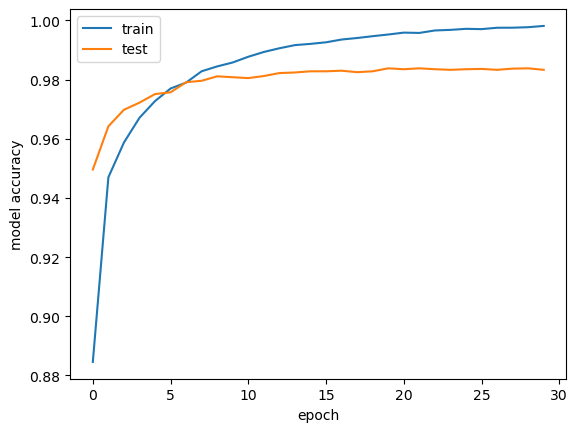

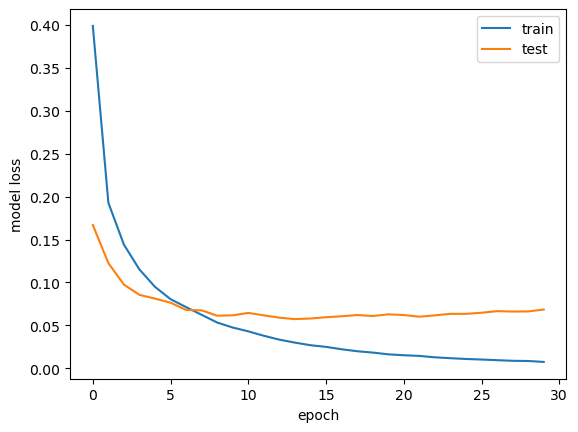

In [12]:
# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

Infine testiamo il modello creato.

313/313 [==============================] - 2s 4ms/step


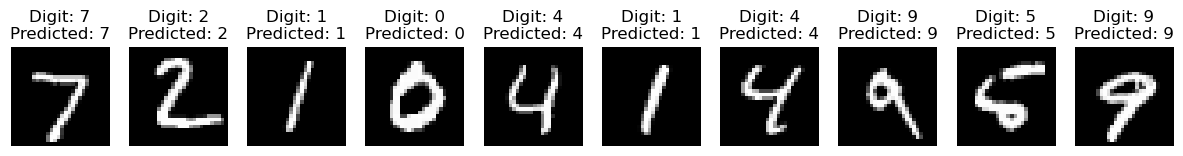

In [13]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

## <span style="color:blue"> Esercizio 12.3 </span>

Come ultimo esercizio, si vuole applicare il modello creato a cifre scritte con la propria calligrafia.  
Si è usato _GIMP (GNU Image Manipulation Program)_ per creare le immagini $28\times28$ e le si è importate tramite _PIL (Python Image Library)_.

In [14]:
from PIL import Image
import os

def plot_digit(filename):
    digit_in = Image.open(digit_filename).convert('L')
    #digit_in = Image.open("8b.png").convert('L') #ON GOOGLE COLAB INSERT THE NAME OF THE UPLOADED FILE

    ydim, xdim = digit_in.size
    print("Image size: "+str(xdim)+"x"+str(ydim))
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255
    
    print(data.shape)
    data = data.reshape(1, xdim, ydim, 1)  # Correct form for CNN model
    print(data.shape)
    pred_0 = model_CNN.predict(data)

    data = data.reshape(xdim, ydim)

    plt.figure(figsize=(5,5))
    plt.imshow(data, cmap='gray')
    plt.title("Digit predicted:    {}".format(np.argmax(pred_0)))
    plt.axis('off')
    plt.show()

Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 35ms/step


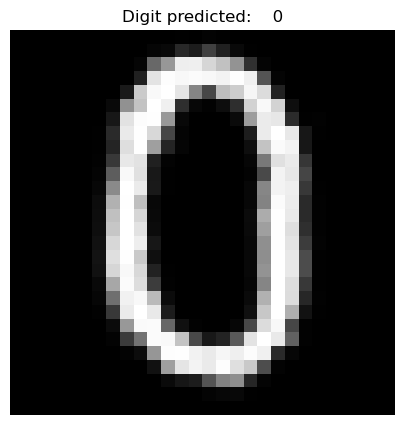

In [15]:
digit_filename = "./Pictures/Zero.png"
plot_digit(digit_filename)

Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 28ms/step


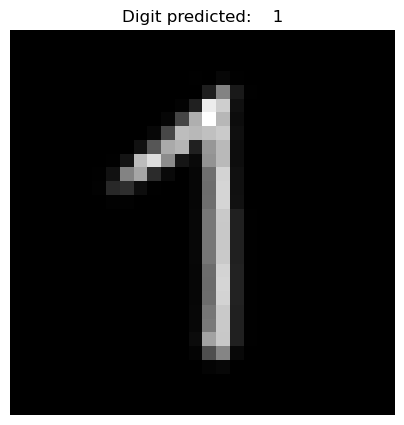

In [16]:
digit_filename = "./Pictures/One.png"
plot_digit(digit_filename)

Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 30ms/step


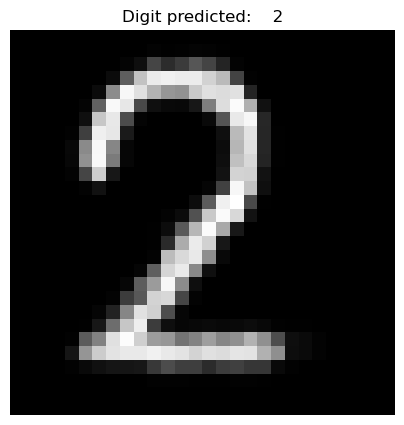

In [17]:
digit_filename = "./Pictures/Two.png"
plot_digit(digit_filename)

Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 29ms/step


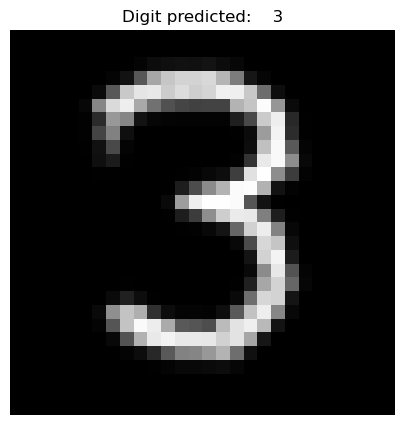

In [18]:
digit_filename = "./Pictures/Three.png"
plot_digit(digit_filename)

Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 30ms/step


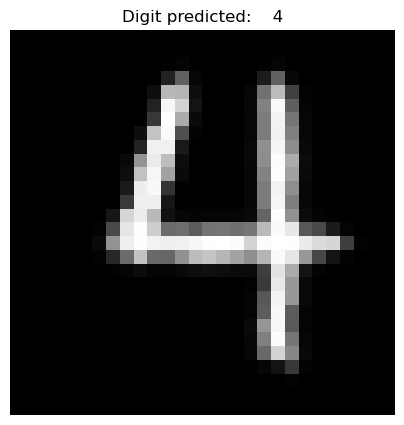

In [19]:
digit_filename = "./Pictures/Four.png"
plot_digit(digit_filename)

Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 30ms/step


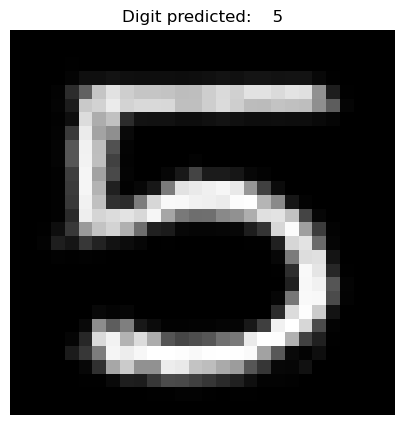

In [20]:
digit_filename = "./Pictures/Five.png"
plot_digit(digit_filename)

Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 28ms/step


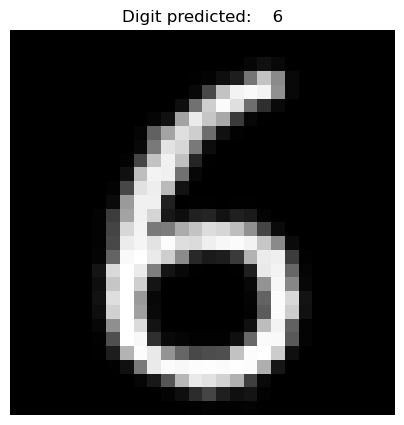

In [21]:
digit_filename = "./Pictures/Six.png"
plot_digit(digit_filename)

Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 31ms/step


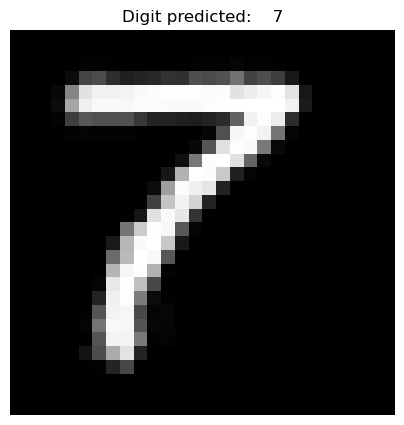

In [22]:
digit_filename = "./Pictures/Seven.png"
plot_digit(digit_filename)

Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 30ms/step


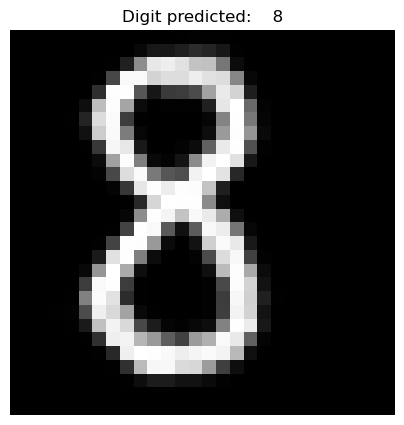

In [23]:
digit_filename = "./Pictures/Eight.png"
plot_digit(digit_filename)

Image size: 28x28
(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 29ms/step


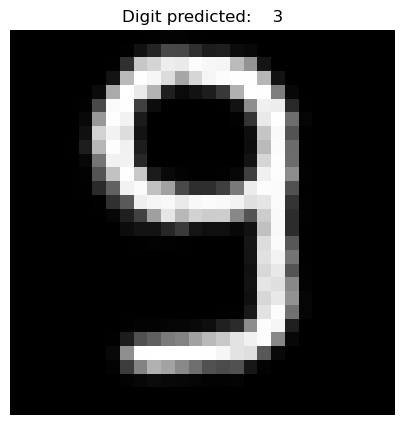

In [24]:
digit_filename = "./Pictures/Nine.png"
plot_digit(digit_filename)